Train a model to predict the images, obtained from MNIST Fashion Dataset.

In [1]:
# to train a model with data obtained from fashion_mist dataset and then test the other images and labels.
# Here we are taking the shoes.
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

mnist = tf.keras.datasets.fashion_mnist
# use of load_data() to load all images which contains 60,000 training images and 10,0000 testing images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Each training and test example is assigned to one of the following labels:
# 0 - T-shirt/top, 1 - Trouser, 2 - Pullover, 3 - Dress, 4 - Coat, 5 - Sandal, 6 - Shirt, 7 - Sneaker, 8 - Bag, 9 - Ankle boot
print(train_images.shape, test_images.shape)


4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)


0


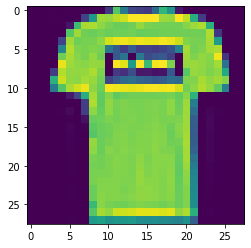

In [2]:
# Printing 'an' Image and its labels
plt.imshow(train_images[1])
print(train_labels[1])

In [6]:
# Normalizing Data
# 255 is max value; divided to make all values between 0 and 1
train_images  = train_images / 255.0
test_images = test_images / 255.0
# Sequential is to defines a SEQUENCE of layers in the neural network
# Flatten: Turn the image of 28*28 into a single array
# Each hideen layer of neurons need an activation function to tell them what to do.
# Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.
# Softmax takes a set of values, and effectively picks the biggest one, 
# so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!
model = tf.keras.Sequential([
                          tf.keras.layers.Flatten(input_shape = (28, 28)),
                          tf.keras.layers.Dense(128, activation = tf.nn.relu),
                          tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])
# optimizzer function is to minimize loss
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])
# train the model
history = model.fit(train_images, train_labels, epochs = 100, validation_data=(test_images, test_labels))
model.summary()

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0684 - accuracy: 0.6755 - val_loss: 0.7049 - val_accuracy: 0.7512
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6315 - accuracy: 0.7727 - val_loss: 0.5994 - val_accuracy: 0.7830
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5582 - accuracy: 0.7992 - val_loss: 0.5538 - val_accuracy: 0.7996
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5179 - accuracy: 0.8158 - val_loss: 0.5252 - val_accuracy: 0.8098
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4912 - accuracy: 0.8266 - val_loss: 0.5063 - val_accuracy: 0.8154
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4719 - accuracy: 0.8341 - val_loss: 0.4939 - val_accuracy: 0.8217
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4571 - accuracy: 0.8379 - val_loss: 0.4849 - val_ac

In [7]:
def plot_history(history):
  # function to plot accuracy vs epoch and loss vs epoch
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.title("Accuracy vs Epoch")
  plt.show()
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='lower right')
  plt.title("Loss vs Epoch")
  plt.show()  
  print("Accuracy for training data: ",history.history['accuracy'][-1])
  print("Accuracy for testing data : ", history.history['val_accuracy'][-1])

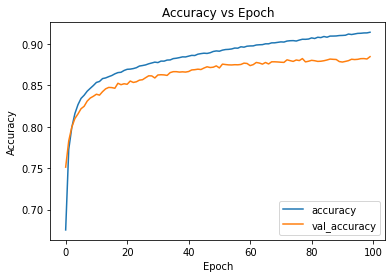

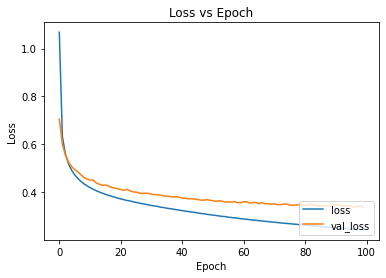

Accuracy for training data:  0.9139666557312012
Accuracy for testing data :  0.8845000267028809


In [9]:
plot_history(history)